# 1. Install and Import Dependencies

In [1]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [1]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\user/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-3-23 Python-3.9.16 torch-2.0.0 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [3]:
img = 'https://img95.699pic.com/photo/50122/6752.jpg_wh300.jpg!/fh/300'

In [4]:
results = model(img)
results.print()

image 1/1: 300x450 7 persons, 4 ties
Speed: 770.3ms pre-process, 113.0ms inference, 133.6ms NMS per image at shape (1, 3, 448, 640)


In [1]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

NameError: name 'plt' is not defined

In [10]:
results.xyxy

[tensor([[363.41284,  76.97665, 450.00000, 300.00000,   0.93016,   0.00000],
         [182.33327,  88.05366, 275.59531, 298.08975,   0.92918,   0.00000],
         [  2.67132,  99.43195, 100.26749, 298.95566,   0.92829,   0.00000],
         [132.18091, 113.89484, 193.25732, 299.12320,   0.92062,   0.00000],
         [309.61050, 100.07191, 381.93515, 299.14246,   0.90961,   0.00000],
         [ 78.66705, 102.15288, 155.81953, 297.89825,   0.86935,   0.00000],
         [260.88824, 111.46970, 330.57324, 300.00000,   0.83883,   0.00000],
         [ 62.61055, 148.21593,  72.23167, 187.38673,   0.73883,  27.00000],
         [108.33829, 151.30281, 120.79688, 184.53792,   0.72266,  27.00000],
         [389.42139, 132.15897, 400.84442, 183.40567,   0.70415,  27.00000],
         [221.78038, 149.65723, 231.96442, 181.19182,   0.62740,  27.00000]], device='cuda:0')]

In [11]:
np.squeeze(results.render()).shape

(300, 450, 3)

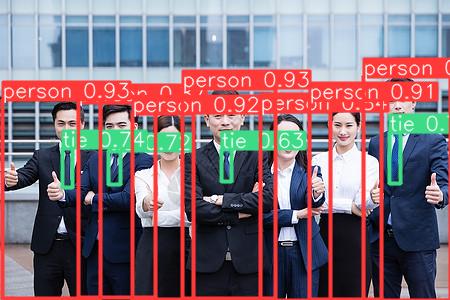

In [12]:
results.show()

# 4. Real Time Detections

In [39]:
#webcam:0 ; video:"local_path"
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [2]:
import uuid   # Unique identifier
import os
import time

In [3]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [45]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [6]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.d08d0065-c98a-11ed-b337-7cb27d50a081.jpg


In [7]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.d1032bd4-c98a-11ed-afad-7cb27d50a081.jpg
data\images\awake.d1032bd5-c98a-11ed-8f00-7cb27d50a081.jpg
data\images\awake.d1032bd6-c98a-11ed-bc40-7cb27d50a081.jpg
data\images\awake.d1035304-c98a-11ed-af72-7cb27d50a081.jpg
data\images\awake.d1035305-c98a-11ed-b354-7cb27d50a081.jpg
data\images\awake.d1035306-c98a-11ed-a9b4-7cb27d50a081.jpg
data\images\awake.d1035307-c98a-11ed-90e8-7cb27d50a081.jpg
data\images\awake.d1035308-c98a-11ed-b2fb-7cb27d50a081.jpg
data\images\awake.d1035309-c98a-11ed-96dc-7cb27d50a081.jpg
data\images\awake.d103530a-c98a-11ed-8aa0-7cb27d50a081.jpg
data\images\awake.d103530b-c98a-11ed-a9c3-7cb27d50a081.jpg
data\images\awake.d103530c-c98a-11ed-ad8c-7cb27d50a081.jpg
data\images\awake.d103530d-c98a-11ed-9d3d-7cb27d50a081.jpg
data\images\awake.d103530e-c98a-11ed-b770-7cb27d50a081.jpg
data\images\awake.d103530f-c98a-11ed-8a65-7cb27d50a081.jpg
data\images\awake.d1035310-c98a-11ed-938c-7cb27d50a081.jpg
data\images\awake.d1035311-c98a-11ed-951d-7cb27d50a081.j

In [90]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [99]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Traceback (most recent call last):
  File "C:\Users\user\.conda\envs\yolo-drowsiness-detection\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\user\.conda\envs\yolo-drowsiness-detection\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\user\.conda\envs\yolo-drowsiness-detection\Scripts\pyrcc5.exe\__main__.py", line 4, in <module>
  File "C:\Users\user\.conda\envs\yolo-drowsiness-detection\lib\site-packages\PyQt5\pyrcc_main.py", line 21, in <module>
    from PyQt5.QtCore import PYQT_VERSION_STR, QDir, QFile
ModuleNotFoundError: No module named 'PyQt5.sip'


In [17]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)


    392/499     0.791G        nan        nan        nan         23        320:  98%|█████████▊| 65/66 [00:29<00:00,  2.26it/s]
    392/499     0.791G        nan        nan        nan         23        320: 100%|██████████| 66/66 [00:29<00:00,  2.27it/s]
    392/499     0.791G        nan        nan        nan         23        320: 100%|██████████| 66/66 [00:29<00:00,  2.24it/s]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  25%|██▌       | 1/4 [00:00<00:01,  2.24it/s]
                 Class   

# 6. Load Custom Model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp10/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\user/.cache\torch\hub\master.zip
YOLOv5  2023-3-26 Python-3.9.16 torch-2.0.0 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [5]:
img = os.path.join('data', 'images', 'awake.9b28bbc6-c0ba-11ed-9016-7cb27d50a081.jpg')

In [6]:
results = model(img)

In [9]:
!cd yolov5 && python detect.py --weights runs\train\exp10\weights\last.pt --img 640 --conf 0.25 --source ../data/images/awake.9b28bbc6-c0ba-11ed-9016-7cb27d50a081.jpg

detect: weights=['runs\\train\\exp10\\weights\\last.pt'], source=../data/images/awake.9b28bbc6-c0ba-11ed-9016-7cb27d50a081.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-120-g3e55763 Python-3.9.16 torch-2.0.0 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 C:\Users\user\Downloads\YOLO-Drowsiness-Detection-main\data\images\awake.9b28bbc6-c0ba-11ed-9016-7cb27d50a081.jpg: 384x640 1 awake, 41.0ms
Speed: 0.0ms pre-process, 41.0ms inference, 60.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp18


In [7]:
results.print()

image 1/1: 720x1280 1 awake
Speed: 56.6ms pre-process, 59.0ms inference, 7.3ms NMS per image at shape (1, 3, 384, 640)


In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()